# Question Answering

The goal of this project is to build a **deep learning model capable of answering some simple questions**.

This work is based on the *bAbI project*, https://research.fb.com/downloads/babi/, and on the papers *Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks*, https://arxiv.org/pdf/1502.05698.pdf, and *End-To-End Memory Networks*, https://arxiv.org/pdf/1503.08895.pdf. 

#### 1. Perform initial imports

In [1]:
import pickle
import numpy as np

#### 2. Load data

In [2]:
with open("data/train_qa.txt", "rb") as fp:
    train_data =  pickle.load(fp)

In [3]:
with open("data/test_qa.txt", "rb") as fp:
    test_data =  pickle.load(fp)

#### 3. Check data

In [4]:
len(train_data)

10000

In [5]:
len(test_data)

1000

In [6]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [7]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [8]:
# story

' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [9]:
# question

' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [10]:
# answer

train_data[0][2]

'no'

#### 4. Create vocabulary with all the words

In [11]:
vocab = set()

all_data = test_data + train_data

for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [12]:
# add 'yes'/'no' answers to the vocabulary

vocab.add('no')
vocab.add('yes')

In [13]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

#### 5. Set vocabulary length, max story length and max question length

In [14]:
# add 1 extra space for Keras's pad_sequences (0)

vocab_len = len(vocab) + 1

vocab_len

38

In [15]:
# max story length

max_story_len = max([len(data[0]) for data in all_data])

max_story_len

156

In [16]:
# max question length

max_question_len = max([len(data[1]) for data in all_data])

max_question_len

6

#### 6. Vectorize data

In [17]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [18]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [19]:
tokenizer.word_index

{'office': 1,
 'in': 2,
 '?': 3,
 'discarded': 4,
 'dropped': 5,
 'milk': 6,
 'no': 7,
 '.': 8,
 'bathroom': 9,
 'went': 10,
 'took': 11,
 'mary': 12,
 'hallway': 13,
 'there': 14,
 'john': 15,
 'back': 16,
 'up': 17,
 'yes': 18,
 'moved': 19,
 'put': 20,
 'sandra': 21,
 'left': 22,
 'apple': 23,
 'journeyed': 24,
 'picked': 25,
 'grabbed': 26,
 'football': 27,
 'got': 28,
 'down': 29,
 'kitchen': 30,
 'travelled': 31,
 'is': 32,
 'garden': 33,
 'daniel': 34,
 'the': 35,
 'to': 36,
 'bedroom': 37}

In [20]:
def vectorize_data(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    
    # X = STORIES
    X = []
    # Xq = QUESTIONS
    Xq = []
    # Y = CORRECT ANSWERS
    Y = []
    
    
    for story, question, answer in data:
        
        # word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # word index for every word in question
        xq = [word_index[word.lower()] for word in question]
        
        # word index for 'Yes'/'No' answers
        # index 0 is reserved so we're going to use + 1 for the length of y
        y = np.zeros(len(word_index) + 1)
        # y = 1 for index corresponding to the word_index of the answer ('Yes' or 'No')
        y[word_index[answer]] = 1
        
        # append each set of story, question and answer to their respective lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # pad the sequences based on their max length
    # (so that the RNN can be trained on uniformly long sequences)
    X_pad = pad_sequences(X, maxlen=max_story_len)
    Xq_pad = pad_sequences(Xq, maxlen=max_question_len)
    
    Y = np.array(Y)
        
    return (X_pad, Xq_pad, Y)

In [21]:
stories_train, questions_train, answers_train = vectorize_data(train_data)

In [22]:
stories_test, questions_test, answers_test = vectorize_data(test_data)

In [23]:
stories_train

array([[ 0,  0,  0, ..., 35, 37,  8],
       [ 0,  0,  0, ..., 35, 13,  8],
       [ 0,  0,  0, ..., 35,  9,  8],
       ...,
       [ 0,  0,  0, ..., 35, 37,  8],
       [ 0,  0,  0, ...,  6, 14,  8],
       [ 0,  0,  0, ..., 23, 14,  8]])

In [24]:
stories_test

array([[ 0,  0,  0, ..., 35, 37,  8],
       [ 0,  0,  0, ..., 35, 33,  8],
       [ 0,  0,  0, ..., 35, 33,  8],
       ...,
       [ 0,  0,  0, ..., 35, 23,  8],
       [ 0,  0,  0, ..., 35, 33,  8],
       [ 0,  0,  0, ..., 23, 14,  8]])

In [25]:
# for 3 random stories

print(len(stories_train[214]), len(stories_train[2341]), len(stories_train[5679]))

156 156 156


In [26]:
questions_train

array([[32, 21,  2, 35, 13,  3],
       [32, 34,  2, 35,  9,  3],
       [32, 34,  2, 35,  1,  3],
       ...,
       [32, 21,  2, 35, 13,  3],
       [32, 12,  2, 35, 30,  3],
       [32, 12,  2, 35, 37,  3]])

In [27]:
questions_test

array([[32, 15,  2, 35, 30,  3],
       [32, 15,  2, 35, 30,  3],
       [32, 15,  2, 35, 33,  3],
       ...,
       [32, 12,  2, 35, 37,  3],
       [32, 21,  2, 35, 33,  3],
       [32, 12,  2, 35, 33,  3]])

In [28]:
# for 3 random questions

print(len(questions_train[256]), len(questions_train[2356]), len(questions_train[7409]))

6 6 6


All the stories and questions are now vectorized and padded (even though all the questions seem  to have the same length by default, we've padded them just to be safe).

In [29]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [31]:
tokenizer.word_index['yes']

18

In [32]:
tokenizer.word_index['no']

7

As expected, only two values of the vectorized answers are not zero. We have 497 positive answers (index 18) and 503 negative answers (index 7) for the test data.

#### 7. Create the model

In [33]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

We have two inputs, stories and questions and so we need to use placeholders. `Input()` is used to instantiate a Keras tensor.

In [34]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [35]:
# Input Encoder m

input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.3))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
# Input Encoder c

input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [37]:
# Question Encoder

question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [38]:
# encode the sequences

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [39]:
# use dot product to compute the match between first input vector sequence and the question

match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [40]:
# add the match matrix with the second input vector sequence

response = add([match, input_encoded_c])
response = Permute((2, 1))(response)

In [41]:
# concatenate the match matrix with the question vector sequence

answer = concatenate([response, question_encoded])

In [42]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [43]:
# reduce with RNN (LSTM)

answer = LSTM(32)(answer)

In [44]:
# regularization with Dropout

answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [45]:
# we output a probability distribution over the vocabulary

answer = Activation('softmax')(answer)

In [46]:
# build the final model

model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
__________________________________________________________________________________________________
dot_1 (Dot

#### 8. Train the model

In [48]:
qa = model.fit([stories_train, questions_train], answers_train, batch_size=32, epochs=120, validation_data=([stories_test, questions_test], answers_test))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 13s 1ms/step - loss: 0.9028 - acc: 0.4887 - val_loss: 0.7007 - val_acc: 0.4970
Epoch 2/120
10000/10000 [==============================] - 9s 884us/step - loss: 0.7035 - acc: 0.4932 - val_loss: 0.6934 - val_acc: 0.5030
Epoch 3/120
10000/10000 [==============================] - 9s 876us/step - loss: 0.6958 - acc: 0.5023 - val_loss: 0.6933 - val_acc: 0.5030
Epoch 4/120
10000/10000 [==============================] - 9s 890us/step - loss: 0.6950 - acc: 0.4988 - val_loss: 0.6934 - val_acc: 0.5030
Epoch 5/120
10000/10000 [==============================] - 9s 882us/step - loss: 0.6950 - acc: 0.4927 - val_loss: 0.6937 - val_acc: 0.4970
Epoch 6/120
10000/10000 [==============================] - 9s 890us/step - loss: 0.6943 - acc: 0.5034 - val_loss: 0.6939 - val_acc:

Epoch 55/120
10000/10000 [==============================] - 8s 839us/step - loss: 0.3588 - acc: 0.8370 - val_loss: 0.4357 - val_acc: 0.7990
Epoch 56/120
10000/10000 [==============================] - 8s 849us/step - loss: 0.3609 - acc: 0.8335 - val_loss: 0.4294 - val_acc: 0.7910
Epoch 57/120
10000/10000 [==============================] - 8s 845us/step - loss: 0.3583 - acc: 0.8405 - val_loss: 0.4587 - val_acc: 0.7800
Epoch 58/120
10000/10000 [==============================] - 9s 862us/step - loss: 0.3525 - acc: 0.8391 - val_loss: 0.4492 - val_acc: 0.7950
Epoch 59/120
10000/10000 [==============================] - 9s 864us/step - loss: 0.3569 - acc: 0.8401 - val_loss: 0.4436 - val_acc: 0.7880
Epoch 60/120
10000/10000 [==============================] - 8s 845us/step - loss: 0.3525 - acc: 0.8426 - val_loss: 0.4524 - val_acc: 0.7860
Epoch 61/120
10000/10000 [==============================] - 9s 861us/step - loss: 0.3532 - acc: 0.8376 - val_loss: 0.4540 - val_acc: 0.7940
Epoch 62/120
10000/1

10000/10000 [==============================] - 9s 862us/step - loss: 0.2597 - acc: 0.8893 - val_loss: 0.5748 - val_acc: 0.8060
Epoch 114/120
10000/10000 [==============================] - ETA: 0s - loss: 0.2458 - acc: 0.896 - 9s 869us/step - loss: 0.2457 - acc: 0.8960 - val_loss: 0.5635 - val_acc: 0.8170
Epoch 115/120
10000/10000 [==============================] - 9s 866us/step - loss: 0.2539 - acc: 0.8916 - val_loss: 0.5792 - val_acc: 0.8180
Epoch 116/120
10000/10000 [==============================] - 9s 885us/step - loss: 0.2427 - acc: 0.8992 - val_loss: 0.5794 - val_acc: 0.8190
Epoch 117/120
10000/10000 [==============================] - 9s 899us/step - loss: 0.2496 - acc: 0.8942 - val_loss: 0.5730 - val_acc: 0.8130
Epoch 118/120
10000/10000 [==============================] - 9s 865us/step - loss: 0.2528 - acc: 0.8936 - val_loss: 0.5686 - val_acc: 0.8130
Epoch 119/120
10000/10000 [==============================] - 9s 865us/step - loss: 0.2507 - acc: 0.8923 - val_loss: 0.5817 - val_a

#### 9. Save the model

In [49]:
filename = 'qa_120_epochs.h5'
model.save(filename)

#### 10. Plot training history

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


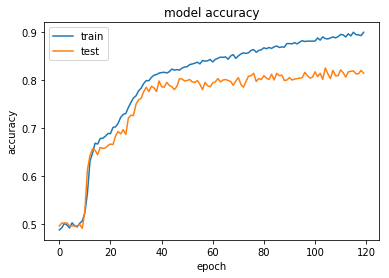

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
print(qa.history.keys())
# summarize history for accuracy
plt.plot(qa.history['acc'])
plt.plot(qa.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 11. Evaluate and test the model

In [51]:
predictions = model.predict(([stories_test, questions_test]))

In [52]:
predictions

array([[1.46382896e-14, 1.70085266e-14, 1.58988694e-14, ...,
        1.42198299e-14, 1.59783956e-14, 1.58654861e-14],
       [3.63212742e-13, 3.93054838e-13, 3.59840819e-13, ...,
        3.40538416e-13, 3.89172744e-13, 3.55816125e-13],
       [1.70315049e-14, 1.97693695e-14, 1.81275232e-14, ...,
        1.74386550e-14, 1.91940139e-14, 1.90443178e-14],
       ...,
       [8.63874080e-17, 1.10968496e-16, 9.37790807e-17, ...,
        9.18978999e-17, 1.13373176e-16, 1.10015921e-16],
       [2.80486702e-16, 3.27027721e-16, 3.25891982e-16, ...,
        2.91102036e-16, 3.07913391e-16, 3.22496016e-16],
       [1.80679793e-22, 2.20827815e-22, 2.30842764e-22, ...,
        1.90054199e-22, 1.79911556e-22, 2.09176087e-22]], dtype=float32)

In [53]:
# story #0

story = ' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [54]:
# question #0

question = ' '.join(word for word in test_data[0][1])
print(question)

Is John in the kitchen ?


In [55]:
# answer #0

print("True test answer from data is:", test_data[0][2])

True test answer from data is: no


In [56]:
# predictions for answer #0

print(predictions[0])
print(len(predictions[0]))

[1.46382896e-14 1.70085266e-14 1.58988694e-14 1.83372909e-14
 1.65865653e-14 1.44100243e-14 1.63785408e-14 9.98939335e-01
 1.57426206e-14 1.58539902e-14 1.62395579e-14 1.59676722e-14
 1.55482367e-14 1.41915161e-14 1.35159125e-14 1.49089369e-14
 1.59082715e-14 1.55568985e-14 1.06062007e-03 1.43970021e-14
 1.60309930e-14 1.44801705e-14 1.58517540e-14 1.48582064e-14
 1.65406612e-14 1.53848068e-14 1.74070234e-14 1.70684525e-14
 1.45875065e-14 1.77978749e-14 1.62807440e-14 1.61880668e-14
 1.49000956e-14 1.79433511e-14 1.55443217e-14 1.42198299e-14
 1.59783956e-14 1.58654861e-14]
38


In [57]:
# generate prediction from model

val_max = np.argmax(predictions[0])

for key, value in tokenizer.word_index.items():
    if value == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of prediction being the right answer:", predictions[0][val_max])

Predicted answer is:  no
Probability of prediction being the right answer: 0.99893934


As expected, the predicted answer is 'no'.

In [72]:
# test the model on new story and question
# we can only use the words in the vocabulary

print(vocab)

{'office', 'in', '?', 'discarded', 'dropped', 'milk', 'no', '.', 'bathroom', 'went', 'took', 'Mary', 'hallway', 'there', 'John', 'back', 'up', 'yes', 'moved', 'put', 'Sandra', 'left', 'apple', 'journeyed', 'picked', 'grabbed', 'football', 'got', 'down', 'kitchen', 'travelled', 'Is', 'garden', 'Daniel', 'the', 'to', 'bedroom'}


In [73]:
# create new story

my_story = "John grabbed the apple in the kitchen . Sandra moved to the office ."
my_story.split()

['John',
 'grabbed',
 'the',
 'apple',
 'in',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'moved',
 'to',
 'the',
 'office',
 '.']

In [74]:
# create new question

my_question = "Is John in the kitchen ?"
my_question.split()

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [75]:
# my_data = [(my_story, my_question, my_answer)]

my_data = [(my_story.split(), my_question.split(), 'yes')]

In [76]:
# vectorize new data

my_story, my_question, my_answer = vectorize_data(my_data)

In [77]:
# predict my_answer

prediction = model.predict(([my_story, my_question]))

In [78]:
# generate prediction from model

val_max = np.argmax(prediction[0])

for key, value in tokenizer.word_index.items():
    if value == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of prediction being the right answer:", prediction[0][val_max])

Predicted answer is:  yes
Probability of prediction being the right answer: 0.94050664


The model correctly predicted that the correct answer is 'yes'.